## Solving a linear regression problem using a neural network

In [16]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models
from tensorflow.keras import optimizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
train_labels.shape

(404,)

In [5]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

We have to normalize the data

In [6]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

In [14]:
def build_model_regression(lr_var, input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.RMSprop(lr=lr_var),
        loss='mse',
        metrics=['mae'])
    return model

In [8]:
k = 4
num_val_samples = len(train_data) // k
num_epoch = 80

all_history = []

In [13]:
value = 2
value * num_val_samples

202

In [18]:
for i in range(k):
    print('Fold:', i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_target = train_labels[i*num_val_samples: (i+1)*num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]
        ],
        axis=0
    )

    partial_train_targets = np.concatenate([
        train_labels[:i * num_val_samples],
        train_labels[(i+1) * num_val_samples:]
        ],
        axis=0
    )

    model = build_model_regression(0.001, 13)
    history = model.fit(partial_train_data, partial_train_targets,
        epochs=num_epoch,
        batch_size=16,
        validation_data=(val_data, val_target),
        verbose=0)

    all_history.append(history.history['val_mae'])

Fold: 0
Fold: 1
Fold: 2
Fold: 3


In [19]:
len(all_history[0])

80

In [20]:
all_history[0]

[18.68265151977539,
 15.25568675994873,
 11.023076057434082,
 7.08678674697876,
 5.075531482696533,
 4.239210605621338,
 3.907670736312866,
 3.589332103729248,
 3.4784364700317383,
 3.263150691986084,
 3.1036341190338135,
 3.1742260456085205,
 2.9402270317077637,
 2.908832550048828,
 2.8730435371398926,
 2.700927734375,
 2.6805758476257324,
 2.5927014350891113,
 2.556248664855957,
 2.5465619564056396,
 2.5493507385253906,
 2.4202373027801514,
 2.3717281818389893,
 2.4281394481658936,
 2.3310837745666504,
 2.3013713359832764,
 2.2733540534973145,
 2.2227842807769775,
 2.250178337097168,
 2.22151780128479,
 2.2052767276763916,
 2.2586071491241455,
 2.1544220447540283,
 2.1321983337402344,
 2.1567249298095703,
 2.1357979774475098,
 2.1536858081817627,
 2.116163730621338,
 2.190315008163452,
 2.0552611351013184,
 2.108398199081421,
 2.054197311401367,
 2.056774377822876,
 2.115865468978882,
 2.0094943046569824,
 2.0368616580963135,
 2.0338051319122314,
 2.2139852046966553,
 2.0239560604095

In [23]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)
all_mae_avg

0     18.901000
1     15.193702
2     10.830604
3      7.247948
4      5.524745
        ...    
75     2.444805
76     2.398302
77     2.444304
78     2.355138
79     2.355227
Length: 80, dtype: float64

# Analysis results

## Visualization

In [24]:
import matplotlib.pyplot as plt

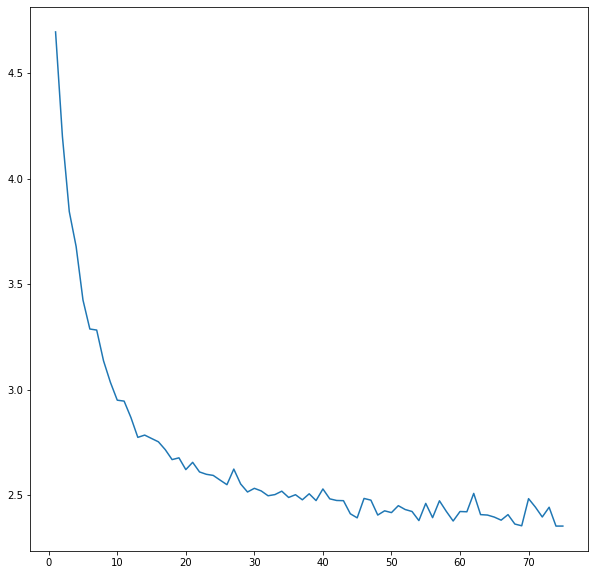

In [29]:
fig = plt.figure(figsize=(10, 10))
plt.plot(range(1, len(all_mae_avg[5:]) + 1), all_mae_avg[5:])
plt.show()

In [30]:
## Evaluation of the model
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 18.8908 - mae: 2.7562


[18.890792846679688, 2.756223440170288]